In [1]:
# from pyspark.sql import SparkSession
# import pyspark.pandas as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# spark = (
#     SparkSession.builder.appName("BNPL")
#     .config("spark.sql.repl.eagerEval.enabled", True) 
#     .config("spark.sql.parquet.cacheMetadata", "true")
#     .config("spark.driver.memory", "8g")
#     .getOrCreate()
# )

data_directory = "../data/"
tables_directory = data_directory + "tables/"
transactions_directory = "../data/curated/transactions.parquet"

In [2]:
transactions = pd.read_parquet(transactions_directory)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13171143 entries, 0 to 13614674
Data columns (total 21 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   user_id                        int64         
 1   merchant_abn                   int64         
 2   dollar_value                   float64       
 3   order_id                       object        
 4   order_datetime                 datetime64[ns]
 5   merchant_name                  object        
 6   tags                           object        
 7   sector_tags                    object        
 8   revenue_band                   object        
 9   take_rate                      object        
 10  consumer_name                  object        
 11  state                          object        
 12  postcode                       int64         
 13  gender                         object        
 14  comp_Yr_12_eq_percent          float64       
 15  comp_Yr_12_eq

In [44]:
transactions

,user_id,merchant_abn,dollar_value,order_id,order_datetime,merchant_name,tags,sector_tags,revenue_band,take_rate,...,state,postcode,gender,comp_Yr_12_eq_percent,comp_Yr_12_eq_percent_M,comp_Yr_12_eq_percent_F,house_repay_to_income,Median_age_persons,Median_tot_prsnl_inc_weekly,Median_mortgage_repay_monthly
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,WA,6935,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20864,28000487688,378.937918,f7eca4c5-474b-4ab2-ad61-6a8219b26d67,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,QLD,4113,Female,0.592941,0.600954,0.584624,0.218997,35.0,753.0,1730.0
2,22666,28000487688,108.164737,f93ae993-80eb-42d1-aaa6-3659e759ed87,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,QLD,4055,Female,0.531211,0.521567,0.540709,0.194157,38.0,1023.0,2100.0
3,23228,28000487688,329.178020,2a61a2f3-fbca-4011-87a3-6f45b4f1f7ed,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,NSW,2048,Male,0.674367,0.659671,0.688491,0.289064,36.0,1283.0,3000.0
4,5131,28000487688,425.750157,b0b4b456-e286-4b84-8313-f5c7210c7b4b,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,WA,6904,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614670,4308,55403018592,6667.835009,9a9aa6a5-3a74-4c5c-bd30-7b3a68576fa5,2022-06-23,Elit Limited,"((antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",b,4.84,...,TAS,7186,Male,0.260204,0.280374,0.298851,0.292969,58.0,505.0,1300.0
13614671,2327,46537010521,2429.912404,a6c6fe4a-9e8c-46d3-af7d-6e05aa404d6b,2022-04-23,Tempor Augue Ac Company,"[(jewelry, watch, clock, and silverware shops)...","jewelry, watch, clock, and silverware shops",c,2.18,...,WA,6969,Undisclosed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13614672,21431,46537010521,25661.545687,469c1f2d-4d40-4a1e-96b7-68db65f16c66,2022-10-05,Tempor Augue Ac Company,"[(jewelry, watch, clock, and silverware shops)...","jewelry, watch, clock, and silverware shops",c,2.18,...,WA,6336,Female,0.361516,0.345550,0.366667,0.066584,38.0,920.0,395.0
13614673,12663,47047735645,40896.257822,eb6dbb76-2682-45e3-a859-3a1f8b395f7f,2022-04-24,Aenean Gravida Institute,"((antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",c,1.54,...,VIC,3053,Male,0.782088,0.781346,0.782853,0.335161,27.0,658.0,1875.0


# We will try to find any relationships between customer base and total dollar transactions

In [39]:
transactions_col = transactions.groupby(['merchant_abn']).agg({"merchant_name": lambda x: x.iloc[0],"dollar_value": np.sum, "user_id": pd.Series.nunique, "order_id": np.count_nonzero}).reset_index()
transactions_col.rename(columns={'user_id':'user_total', 'order_id':'order_total'}, inplace = True)
transactions_col

,merchant_abn,merchant_name,dollar_value,user_total,order_total
0,10023283211,Felis Limited,6.576785e+05,2974,3194
1,10142254217,Arcu Ac Orci Corporation,9.599445e+04,2721,2891
2,10165489824,Nunc Sed Company,5.618047e+04,5,5
3,10187291046,Ultricies Dignissim Lacus Foundation,3.540395e+04,324,325
4,10192359162,Enim Condimentum PC,1.527938e+05,367,369
...,...,...,...,...,...
4021,99938978285,Elit Dictum Eu Ltd,4.195279e+05,11983,16599
4022,99974311662,Mollis LLP,3.429294e+04,126,126
4023,99976658299,Sociosqu Corp.,3.216241e+06,14677,22561
4024,99987905597,Commodo Hendrerit LLC,5.931561e+04,180,182


/Users/jamespark/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_total', ylabel='dollar_value'>

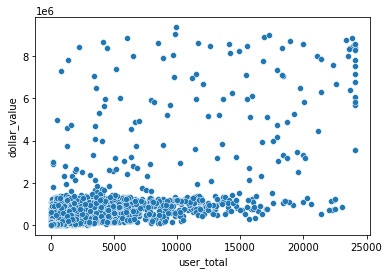

In [40]:
sns.scatterplot(transactions_col['user_total'], transactions_col['dollar_value'])

We see some unique points where a small customer base (<5000) has a very high dollar transactions value that is on par or higher than other merchants with a larger customer base.

/Users/jamespark/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 5000.0)

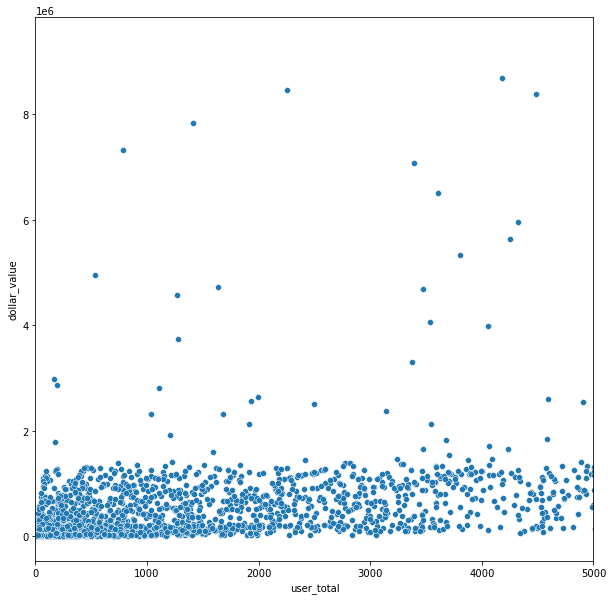

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(transactions_col['user_total'], transactions_col['dollar_value'])
plt.xlim((0,5000))

We will put the cutoff at 3000000 dollars and key out those merchants as interesting

In [42]:
interesting_merch = transactions_col[(transactions_col['dollar_value']>3000000) & (transactions_col['user_total']<5000)]

In [43]:
interesting_merch.sort_values('dollar_value', ascending=False)

,merchant_abn,merchant_name,dollar_value,user_total,order_total
3154,79827781481,Amet Risus Inc.,8.684270e+06,4177,4633
3737,93260930990,Pede Cras Vulputate Ltd,8.456840e+06,2250,2355
3268,82368304209,Nec Incorporated,8.379827e+06,4483,4985
984,31334588839,Lacus Aliquam Corporation,7.836298e+06,1409,1456
426,19492220327,Commodo Ipsum Industries,7.317695e+06,782,796
987,31385641294,Semper Auctor PC,7.073810e+06,3389,3647
3951,98166254020,Magna Sed Industries,6.496922e+06,3607,3914
2698,70009327857,Torquent Per Inc.,5.955853e+06,4325,4822
3467,87084550311,Vulputate Inc.,5.638301e+06,4252,4658
3396,85529538986,Sed Neque Associates,5.327713e+06,3806,4163


# Now we will see another interest merchant sector by looking for high transaction values
The main idea is that since BNPL would help ease the burden of paying a high price by paying in installments, merchants that usually sell products at a high price would likely have an increase influx of customers. Not only that, with the adoption of BNPL, many shoppers would be inclined to use BNPL again as they gain more control over their cash flows. "In fact, a March 2021 study by the Motley Fool found 36% of BNPL shoppers use it once a month or more". So these merchants would be interesting as they could potententially be much more successful in the future. (https://mutesix.com/break-it-down-five-tips-to-choosing-the-right-bnpl-provider-for-your-brand/)